### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\June_2022\climate_df_June22.pkl")

In [3]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
137,1532149815081021440,[],"rt @jordanmulinzi: this is in the horn of africa. these are pictures that you often won’t see in mainstream media, but climate change is re…",None,False,bethDaru,Wed Jun 01 23:59:16 +0000 2022
826,1532149008315056130,[],"it’s sad my roommate truly believes all of the propaganda about climate change, c19, new pride flag. my saving grace is that he’s not a proselytizer",None,False,pathicusfello,Wed Jun 01 23:56:04 +0000 2022
857,1532148975440015360,[],@caclimate propaganda,CAClimate,False,Haywood100,Wed Jun 01 23:55:56 +0000 2022
2464,1532147007208718337,[],"@telvi_idk @michaelorwell2 @earthb4worth @riseup4climate this troll retweets a climate-science-illiterate conspiracy addled meme using a graphic that refutes his claims🤣\n\nhttps://t.co/5qvfxrbudw\n\n""but as greenhouse-gas emissions warm earth’s climate, it's possible our planet has seen its last glaciation for a long time.""\n\noops https://t.co/fnwuifslq7",Telvi_idk,False,Ceist8,Wed Jun 01 23:48:07 +0000 2022
2610,1532146821266481152,[],"rt @senwhitehouse: “in late march, afp fact check, a global fact-checking organization, debunked the assertion that climate policies from t…",None,False,desertsongnm,Wed Jun 01 23:47:22 +0000 2022
3245,1532146052253507584,"[ClimateBrawl, ClimateCrisis, ClimateEmergency]",rt @geraldkutney: climate deniers are berserkers of propaganda and other lies.\n\n#climatebrawl #climatecrisis #climateemergency,None,False,ElisabetSundbe3,Wed Jun 01 23:44:19 +0000 2022
4135,1532145046736314372,[],rt @wearethemsm: climate lockdowns\n✅ another one for the conspiracy theorists https://t.co/hyibyvc8ds,None,False,bitterberrycake,Wed Jun 01 23:40:19 +0000 2022
4373,1532144773938589696,[],"rt @senwhitehouse: “in late march, afp fact check, a global fact-checking organization, debunked the assertion that climate policies from t…",None,False,schachin,Wed Jun 01 23:39:14 +0000 2022
5189,1532143812616892417,[],@adamnimmer @unusual_whales this absolutely correct but americans are feasting on the “global-warming” or “climate-change” elitist propaganda as the elite continue to buy coastal properties around the globe! same coastal properties they’ve claimed for decades would flood… 🤬,AdamNimmer,False,CSMFulk,Wed Jun 01 23:35:25 +0000 2022
5666,1532143257764786177,[],"rt @jordanmulinzi: this is in the horn of africa. these are pictures that you often won’t see in mainstream media, but climate change is re…",None,False,irenevautour,Wed Jun 01 23:33:13 +0000 2022


# Number of tweets

In [3]:
print(f"{len(df)} texts loaded.")

468904 texts loaded.


In [5]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateCrisis': 9731,
         'ClimateBrawl': 5110,
         'climate': 4870,
         'COP26': 3750,
         'BonnClimateConference': 2980,
         'ClimateEmergency': 2492,
         'misinformation': 2446,
         'climatechange': 2080,
         'ClimateChange': 1897,
         'disinformation': 1869,
         'ClimateDaily': 1807,
         'ClimateAction': 1230,
         'auspol': 1141,
         'Climate200': 1043,
         'Murdoch': 967,
         'Climate': 949,
         'news': 652,
         'Conspiracy': 591,
         'USA': 565,
         'BigOil': 548,
         'Jesuits': 537,
         'Vatican': 537,
         'Diversion': 537,
         'Espionage': 537,
         'PoliticsLive': 530,
         'enemy': 522,
         'sabotage': 522,
         'Treason': 522,
         'Politica': 522,
         'fossilfuel': 491,
         'Propaganda': 481,
         'GlobalWarming': 480,
         'propaganda': 470,
         'NewClimateWar': 460,
         'Misinformation': 458,
        

In [6]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

ClimateBrawl
ClimateCrisis
ClimateEmergency
climatechange
climate
ClimateChange
ClimateTwitter
GlobalWarming
EarthDay2022
Climate
Globalwarming
FlatEarth
Nuclear4Climate
ClimateAction
ClimateDaily
climatechangeisfake
CLIMATE
ClimateActionNow
ClimateCult
NoClimateCrisis
climatecollapse
ClimateChurch
ClimateCatastrophe
ClimateDeniers
ClimateJustice
ClimateScam
Globalists
climatecrisis
ClimateTip
climatecrisisismanmade
climatescience
climatehoax
climatescam
TECH4CLIMATE
GlobalWarmingLies
GlobalIssues
GlobalAction
Globalwarmingisahoax
BonnClimateConference
globalslowing
climateemergency
climatecomm
ClimateLockdowns
climateChange
globalists
Climate200
GlobalLunatics
ClimateDenial
ClimateGoal
climatedelayism
globalwarming
climatechangehoax
ClimatePolicy
climatescientist
climateaction
manmadeglobalwarming
climatescientists
climateeducators
climateactivists
Climate_Change
ClimateChangeHoax
NewClimateWar
ClimateCriminals
ActOnClimate
ClimateAlarmists
ClimateStrike
ClimateDisinformation
actoncli

In [7]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [8]:
df.user_name.value_counts()

hendricxsantos     14603
bvnt123             8850
BJames038409        2190
hassciencebot       1479
GeraldKutney        1461
Veritatem2021       1172
Ceist8              1164
dillan_chillin       854
TinTincognito        765
pcm50800687          748
HmGinYYC             728
drochir_thonnuk      654
ScienceNotDogma      651
FakeTrumpBot1        626
TimeIsFinishing      549
jkingy               546
MikeDel21893959      493
Lamont66C            440
gecko39              433
HearinYQF            424
PlanetEmergenc1      413
ISDglobal            387
Eco1stArt            378
SevaSin22213307      375
tan123               374
JFSebastian146       373
foe_us               371
WizePenguin          355
GrnConservatism      352
KapurVimal1          326
Living4Earth         325
DawnTJ90             317
ConfusedPOLs         308
Robert76907841       304
eric_flesch          302
StromeiLadelle       300
rfeynmansBongos      295
RickHiller11         279
GreenAssam           278
SESuter1             277


# Searching in tweets

# Replies in climate

In [9]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

321259


147645

In [10]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [11]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

16256 Unique Tweets


# Bag of words: Climate change

In [4]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [5]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

[':', 'horn', 'africa.', 'pictures', 'often', 'won’t', 'see', 'mainstream', 'media,', 'climate']


In [15]:
climate_split = [word for word in climate_split if not word in stop_words]

In [16]:
print(climate_split[0:10])

[':', 'horn', 'africa.', 'pictures', 'often', 'won’t', 'see', 'mainstream', 'media,', 'climate']


In [17]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [9]:
pprint(bow_climate.most_common(20))

[('climate', 433439),
 ('change', 138860),
 ('propaganda', 119237),
 ('misinformation', 109583),
 ('news', 87146),
 ('disinformation', 80246),
 ('global', 78127),
 ('conspiracy', 68762),
 ('report', 56424),
 ('say', 56314),
 ('sky', 52128),
 ('australia', 51531),
 ('spread', 43082),
 ('fact', 39428),
 ('people', 37812),
 ('medium', 36043),
 ('check', 34538),
 ('gop', 34370),
 ('fake', 33206),
 ('world', 33085)]


# WordCloud

In [10]:
wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
wordcloud.to_file("word_cloud_June_22.png")

# Count retweets

In [19]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

226660


# Ngrams: Climate

In [20]:
# print(processed_climate)

In [24]:
n = 3

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('sky', 'news', 'australia'), 47212),
 (('hub', 'climate', 'misinformation'), 29074),
 (('global', 'hub', 'climate'), 28468),
 (('australia', 'global', 'hub'), 27207),
 (('news', 'australia', 'global'), 27203),
 (('climate', 'misinformation', 'report'), 25025),
 (('misinformation', 'report', 'say'), 24973),
 (('central', 'source', 'climate'), 18760),
 (('misinformation', 'around', 'world'), 18413),
 (('murdoch', 'sky', 'news'), 16967)]

# Hashtag co-occurence


In [4]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [13]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#business',
  '#ccp',
  '#china',
  '#chinascienceinvestigation',
  '#climate',
  '#humanrights',
  '#propaganda'],
 ['#animalag', '#climatecrisis', '#earth', '#milk'],
 ['#climate', '#climatecult', '#monsanto', '#propaganda', '#wef'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climatecrisis', '#fossilfuel', '#tellthetr'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climate',
  '#climateaction',
  '#climateconference2022',
  '#climatecrisis',
  '#climateemergency'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#climate', '#misinformation', '#socialmedia', '#transparency'],
 ['#climatebrawl', '#climatecrisis', '#climateemergency'],
 ['#cli

In [21]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#fuckthemedia',
 '#dam',
 '#foundonpixstory',
 '#climateactionnow',
 '#cli',
 '#inverno',
 '#construction',
 '#cancelbillionaires',
 '#facistbook',
 '#elonmusk',
 '#economy',
 '#operationmockingbird',
 '#waterpolicy',
 '#speciesextinction',
 '#nazisraus',
 '#release_political_prisoners',
 '#phraseology',
 '#michigan',
 '#criticalthinking',
 '#messiahfromtheshire',
 '#stopfundingfossils',
 '#projectveritas',
 '#reforestation',
 '#stopfossilfuels',
 '#emf',
 '#klimaatsverandering',
 '#nasa',
 '#sciadvice',
 '#unacceptablerisk',
 '#ghiacciomarino',
 '#co2',
 '#citizensunited',
 '#vincenzoep20',
 '#kidsincages',
 '#bashir',
 '#based',
 '#covid_19',
 '#twgtpodcast',
 '#dimlnp',
 '#hydrocarbons',
 '#statisticalcompetition',
 '#amazon',
 '#diverse',
 '#climatechangedenial',
 '#ccp',
 '#luntz',
 '#twitter',
 '#regulationsprotectus',
 '#klimakrise',
 '#power',
 '#ecoci',
 '#timemagazine',
 '#increase',
 '#qanda',
 '#googleio',
 '#eiffageroute',
 '#covididiots',
 '#systemicracism',
 '#batshit'

In [20]:
uni_htags_1 = ['#climatebrawl', '#climatecrisis',
'#climatecrisis', '#climateemergency',
'#bonnclimateconference', '#cop26',
'#climatebrawl', '#climateemergency',
'#covid19', '#globalwarming',
'#co2', '#covid19',
'#co2', '#geoingenierie',
'#co2', '#globalwarming',
'#co2', '#vivi',
'#covid19', '#geoingenierie',
'#covid19', '#vivi',
'#geoingenierie', '#globalwarming',
'#geoingenierie', '#vivi',
'#globalwarming', '#vivi',
'#baydunord', '#equinor',
'#baydunord', '#stopbaydunord',
'#equinor', '#stopbaydunord',
'#climatebrawl', '#climatedaily',
'#climate', '#misinformation',
'#climateaction', '#climatecrisis',
'#cl', '#climatebrawl',
'#climatechange', '#disinformation',
'#climate', '#disinformation',
'#climatechange', '#misinformation',
'#climateactionnow', '#climatecrisis',
'#climate', '#cop26',
'#climatebrawl', '#climateeme',
'#climatecrisis', '#climateeme',
'#climatecrisis', '#disinformation',
'#climate', '#climatechange',
'#climatecrisis', '#climatedaily',
'#climatedaily', '#climateemergency',
'#climatecrisis', '#conspiracy',
'#breakingnews', '#news',
'#climatecrisis', '#covid',
'#cop26', '#misinformation',
'#climatecrisis', '#news',
'#conspiracy', '#news',
'#diversion', '#news',
'#espionage', '#news',
'#jesuits', '#news',
'#news', '#usa',
'#news', '#vatican',
'#climateactionnow', '#climatebrawl',
'#clim', '#climatecrisis',
'#climate', '#climatecrisis',
'#conspiracy', '#diversion',
'#conspiracy', '#espionage',
'#conspiracy', '#jesuits',
'#conspiracy', '#usa']
uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#climateeme', '#vatican', '#climate', '#clim', '#diversion', '#jesuits', '#globalwarming', '#disinformation', '#cop26', '#conspiracy', '#espionage', '#geoingenierie', '#climateactionnow', '#stopbaydunord', '#climatebrawl', '#misinformation', '#news', '#climateemergency', '#bonnclimateconference', '#climatechange', '#climatedaily', '#usa', '#climatecrisis', '#covid19', '#vivi', '#breakingnews', '#baydunord', '#equinor', '#covid', '#climateaction', '#cl', '#co2']


In [21]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [22]:
# filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [23]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

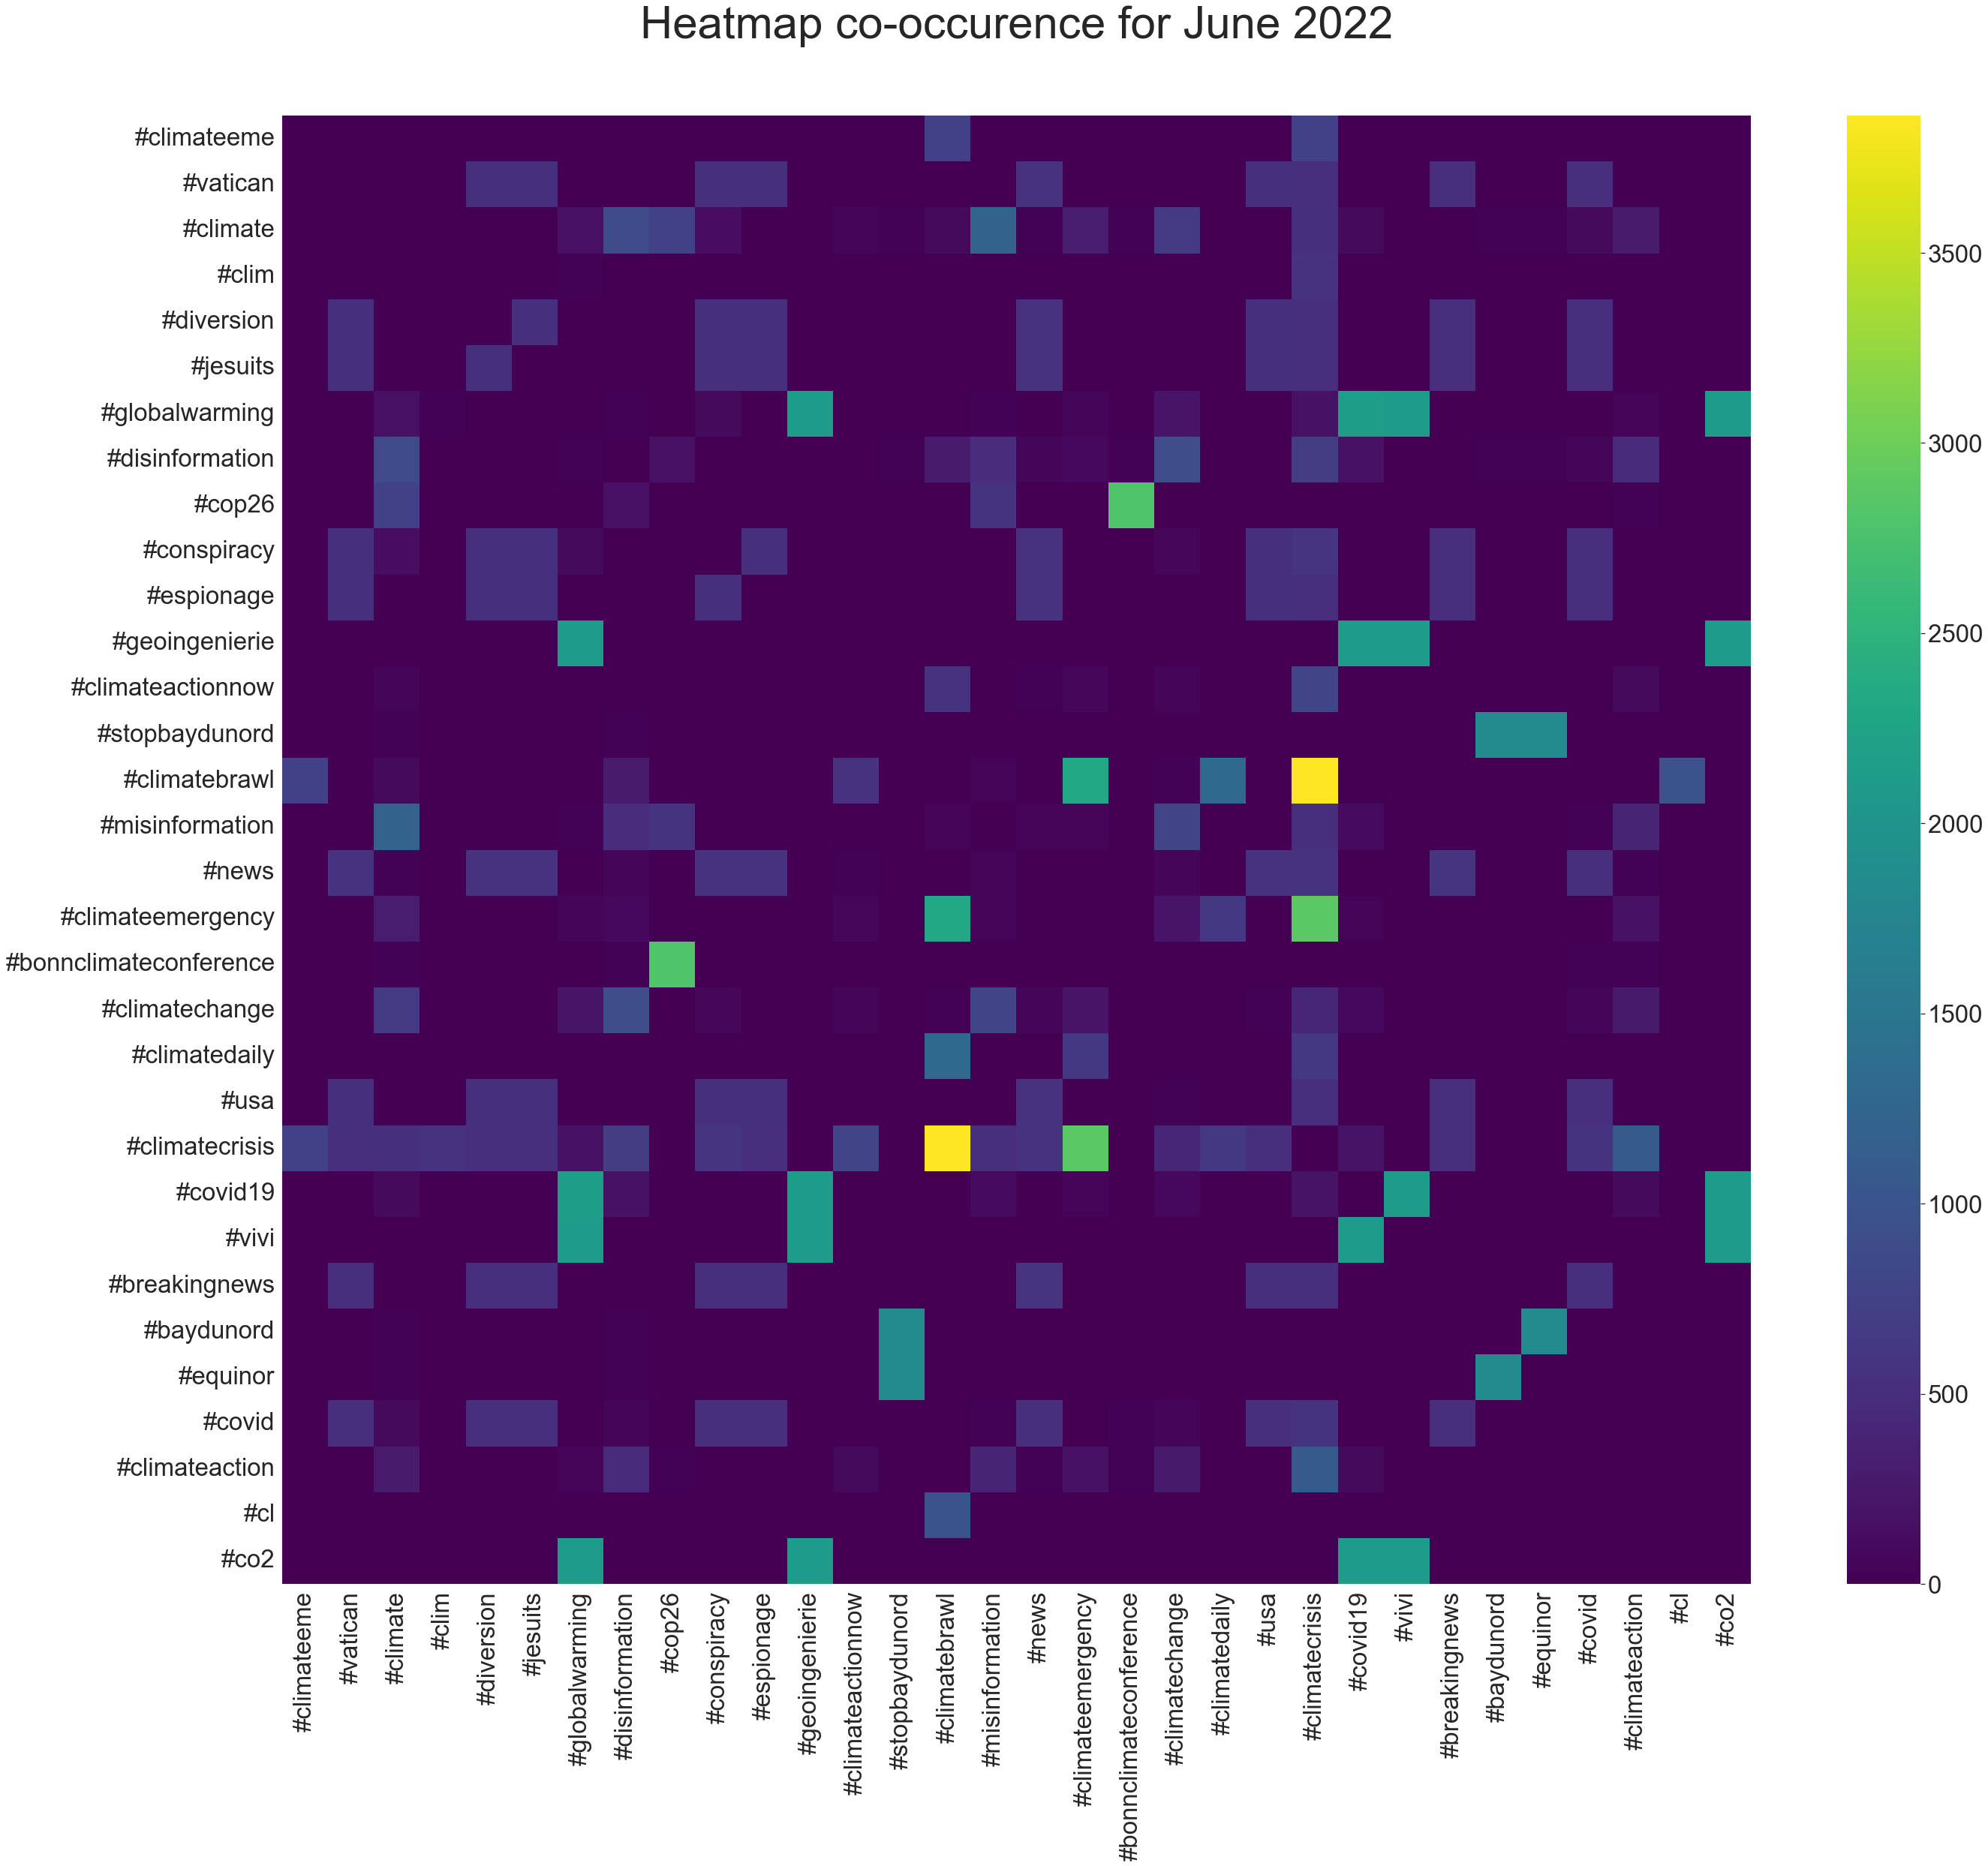

In [25]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for June 2022", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_June22.png")

In [5]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climatebrawl', '#climatecrisis'), 3861),
 (('#climatecrisis', '#climateemergency'), 2870),
 (('#bonnclimateconference', '#cop26'), 2796),
 (('#climatebrawl', '#climateemergency'), 2319),
 (('#covid19', '#globalwarming'), 2135),
 (('#co2', '#covid19'), 2120),
 (('#co2', '#geoingenierie'), 2120),
 (('#co2', '#globalwarming'), 2120),
 (('#co2', '#vivi'), 2120),
 (('#covid19', '#geoingenierie'), 2120),
 (('#covid19', '#vivi'), 2120),
 (('#geoingenierie', '#globalwarming'), 2120),
 (('#geoingenierie', '#vivi'), 2120),
 (('#globalwarming', '#vivi'), 2120),
 (('#baydunord', '#equinor'), 1831),
 (('#baydunord', '#stopbaydunord'), 1831),
 (('#equinor', '#stopbaydunord'), 1831),
 (('#climatebrawl', '#climatedaily'), 1306),
 (('#climate', '#misinformation'), 1219),
 (('#climateaction', '#climatecrisis'), 1076),
 (('#cl', '#climatebrawl'), 985),
 (('#climatechange', '#disinformation'), 910),
 (('#climate', '#disinformation'), 862),
 (('#climatechange', '#misinformation'), 798),
 (('#climateac

# Most common hashtags

In [27]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)
count_htags.most_common(10)

[('#climatecrisis', 14887),
 ('#vote', 14675),
 ('#climate', 7757),
 ('#climatebrawl', 6903),
 ('#climatechange', 6067),
 ('#climateemergency', 4174),
 ('#cop26', 3848),
 ('#misinformation', 3756),
 ('#disinformation', 3233),
 ('#globalwarming', 3149)]

# Concordance

In [52]:
print(climate_strings[0:10000])

 fake news, bud. numbers are declining, size of fires are declining. the only thing that is rising is the blood pressure of climate alarmists who aren’t getting what they want. https://t.co/uk4dset5yi has those crazy climate scientists superceded poopy fake news too far?  hey, peter! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon  hey, dave! we are too educated to fall for the  weekly propaganda pictures. do some real good and focus on what ontarians and your constituents really care about: health, education, climate change, and most importantly social programmes, #not beer #ridiculouspccon rt : it’s also important to distinct this from the right-wing “fema camp” conspiracy, in that:
1. climate breakdown is actual… rt : this is weird conspiracy theory prepper bullshit. this is a sob

In [11]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("assurde.\n#vivi", width=150, lines=50)

Displaying 50 of 2054 matches:
x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.
#vivi #co2 #globalwarming #geoingenierie .

https://t.co/poejyjufps      
x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.
#vivi #co2 #globalwarming #geoingenierie .

https://t.co/9oteaiuzgr rt : 
x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.
#vivi #co2 #globalwarming #geoingenierie .

https://t.co/9oteaiuzgr  emer
x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.
#vivi #co2 #globalwarming #geoingenierie .

https://t.co/9oteaiuzgr rt : 
x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.
#vivi #co2 #globalwarming #geoingenierie .

https://t.co/9oteaiuzgr rt : 
x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.
#vivi #co2 #globalwarming #geoingenierie .

https://t.co/unzmn3onar  emer
x il #covid19, ecco una nuova propaganda per imprigionarci in n

In [10]:
res = []

for index, row in df.iterrows():
    if "#vivi" in row.tweet_text:
        res.append(row.tweet_text)
        
res[0:100]

['@agronotizie emergenze su emergenze, crisi su crisi, tutte per arrivare a violare diritti e libertà! ed ecco la farsa della crisi climatica! come x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.\n#vivi #co2 #globalwarming #geoingenierie .\n\nhttps://t.co/poejyjufps',
 '@agronotizie emergenze su emergenze, crisi su crisi, tutte per arrivare a violare diritti e libertà! ed ecco la farsa della crisi climatica! come x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.\n#vivi #co2 #globalwarming #geoingenierie .\n\nhttps://t.co/9oteaiuzgr',
 '@skytg24 emergenze su emergenze, crisi su crisi, tutte per arrivare a violare diritti e libertà! ed ecco la farsa della crisi climatica! come x il #covid19, ecco una nuova propaganda per imprigionarci in norme assurde.\n#vivi #co2 #globalwarming #geoingenierie .\n\nhttps://t.co/9oteaiuzgr',
 '@ilgiornale emergenze su emergenze, crisi su crisi, tutte per arrivare a violare diritti e libertà! ed ecco 

# Random tweets


In [19]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

65747872                                                                                                                                                                                 rt @aginnt: this is how it works.\n\nlast year - “it’s a conspiracy theory to say the covid lockdowns will lead to climate lockdowns.”\n\ntoday…
59636536                                                                                                                                                                                                                                  @weatherprof @climatecentral @amsbroadcastcon @sci_officer @weatherprof is a fake news provider
74536229                                                                                                                                                                                     rt @isdglobal: today at #bonnclimateconference, we release our landmark report analysing climate mis- and disinformation at #cop26 and beyo…
55405892  

In [26]:
df['tweet_text'].sample(n=10, random_state=1)

25831767                                         same tactics used in every narrative being pushed by elites and govts around the world.\n\n"the global warming issue is bigger than just the science, it's a window into the world of how big the mainstream media journalism malfeasance may be in this issue."\nhttps://t.co/jd8cnylajh
47374020                                                                                                                                                                                                                                                                 has those crazy climate scientists gone putrid fake news too far?
73744544                        @steve_vladeck gop russian mafia plans:\n1. spread terrorist coups, mass shootings\n2. steal social security, medicare\n3. spread global burning, climate disasters\n4. spread more lies and propaganda\n5. kill democracy to enslave, price gouge\n6. keep stealing over $60 trillion from the bottom 91%
9777933

In [105]:
for index, row in df.iterrows():
    if "#massachusetts" in row.tweet_text.lower() and "#misinformation" in row.tweet_text.lower():
        pprint(row.tweet_text)

('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('RT @YaleClimateComm: #Massachusetts is proceeding with a lawsuit against '
 'ExxonMobil for spreading #misinformation about climate change: htt…')
('#Massachusetts is proceeding with a lawsuit against ExxonMobil for spreading '
 '#misinformation about c

# TF-IDF

In [3]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [4]:
len(no_retweets)

94599

In [7]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [8]:
tfidf_data[0:10]

['it s sad my roommate truly believe all of the propaganda about climate change c19 new pride flag my save grace be that he s not a proselytizer',
 'gretard rule number one all evidence contrary to climate emergency be a conspiracy theory',
 'labor supporter who say we need a majority labor govt because they d be able to deal with climate without green or independent interference what be this you know we can t have new fossil fuel project it ll blow our carbon budget what will pacific island think',
 'climate lockdown another one for the conspiracy theorist http t co hyibyvc8ds',
 'i hope this isn t just propaganda in all fairness for all of the ccp fail when it come to humanrights if there s one industrialize nation that can just make big change happen it s china chinascienceinvestigation climate business',
 'unreal tire of hearing climate propaganda nothing we can do with what mother nature do throughout history learn this a long time ago with the farmer almanac',
 'a a queer person 

In [11]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [12]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [13]:
tokens_above_threshold

fabrication            0.987049
hoax                   0.972511
cult                   0.963388
chapter                0.961467
genetics               0.953981
nihilism               0.951844
fmz32oobbz             0.941718
contradict             0.925842
emergency              0.923577
propaganda             0.914346
fiovlyv0zs             0.907134
bullshit               0.906276
dan                    0.902062
sensible               0.898644
vgiippgffx             0.894490
blah                   0.894342
fraud                  0.890905
climatechange          0.889784
jab                    0.888430
katgi8ugyw             0.883769
fear                   0.875792
climatechangeisreal    0.874825
control                0.873562
toxic                  0.866645
ain                    0.855994
theoreeee              0.852060
vzvzyvobnu             0.850626
ucavqnkfge             0.850626
fake                   0.849307
oops                   0.833899
gpvm41de3p             0.832589
crisis  